# Representing Multi qubit states.

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram

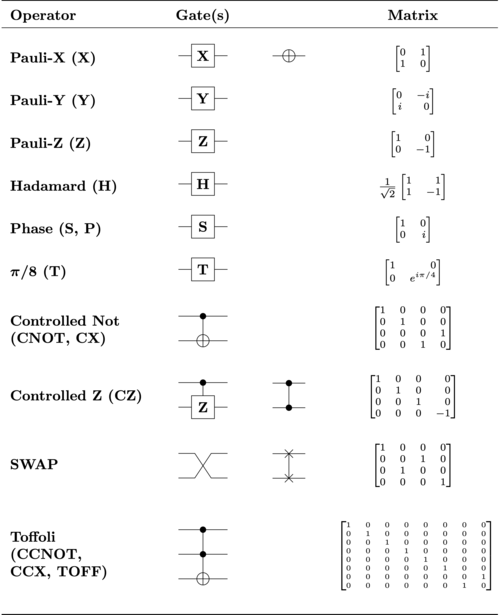

In [2]:
%matplotlib inline

# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
from math import pi
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector
from IPython.core.display import Image, display # for web image to upload in jupyter
display(Image('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Quantum_Logic_Gates.png/500px-Quantum_Logic_Gates.png', width=800, unconfined=True))

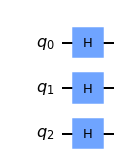

In [3]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qbit in range(3):
    qc.h(qbit)
#qc.h(0)
#qc.h(1)
#qc.h(2)
# See the circuit:
qc.draw('mpl')

In [4]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

# Single qubit gates on multi qubit statevector.

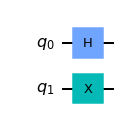

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

# Tensor product of X and H

In [6]:
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()

In [7]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

# X and I tensor product

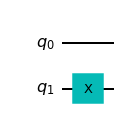

In [8]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw('mpl')

In [9]:
# Simulate the unitary
backend = Aer.get_backend('unitary_simulator')
unitary = execute(qc,backend).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } ")

<IPython.core.display.Math object>

# Multi qubit gate

## CNOT gate

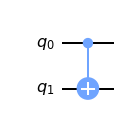

In [11]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw('mpl')

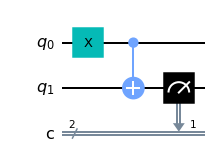

In [12]:
qc = QuantumCircuit(2,2)
# Apply CNOT
qc.x(0)
qc.cx(0,1)
# See the circuit:
qc.measure(1,1)

qc.draw('mpl')


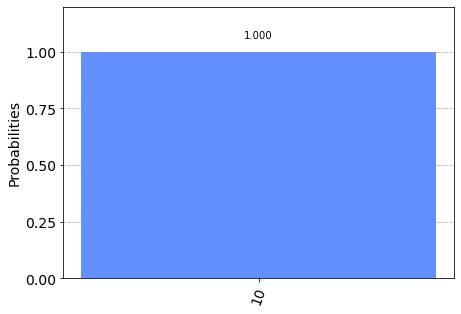

In [13]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

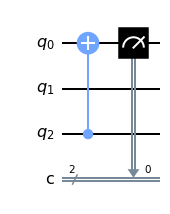

In [15]:
qc = QuantumCircuit(3,2)
# Apply CNOT
qc.cx(2,0)
# See the circuit:
qc.measure(0,0)

qc.draw('mpl')

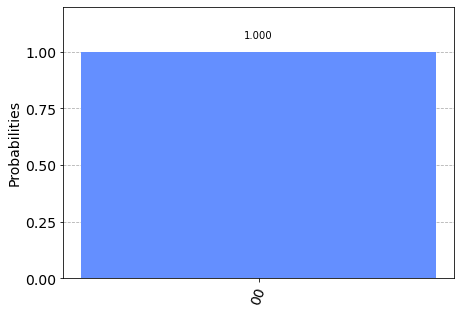

In [16]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

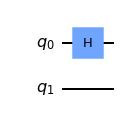

In [17]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [18]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

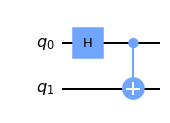

In [19]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [20]:
# Let's see the result:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

# Entangled states

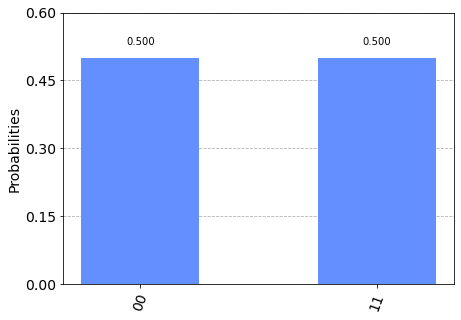

In [21]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

# Visualizing entangled state

In [22]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

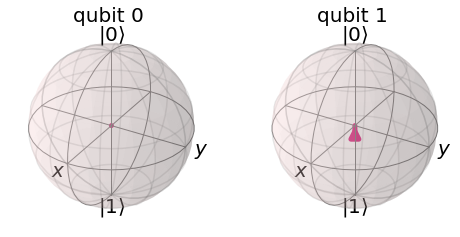

In [23]:
#from qiskit_textbook import bloch_multivector
plot_bloch_multivector(final_state)

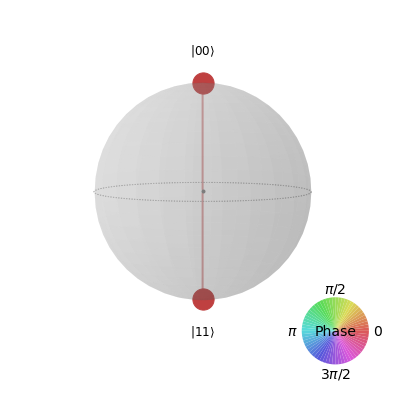

In [24]:
#from qiskit_textbook.widgets import state_qsphere
plot_state_qsphere(final_state)